<a href="https://colab.research.google.com/github/hamdansethi/NLP/blob/main/05_Author_Profiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

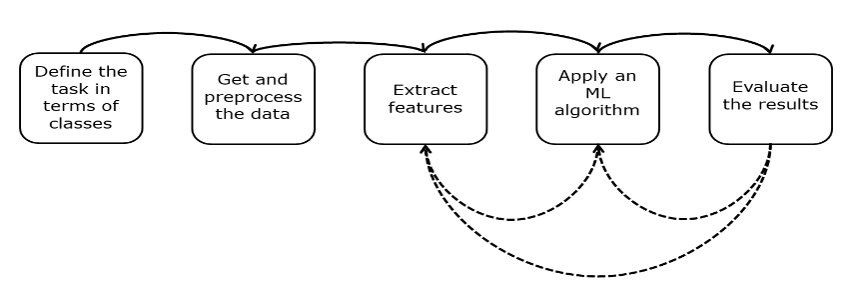

In [13]:
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg

gutenberg.fileids()

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [14]:
nltk.download('punkt_tab')

author1_train = gutenberg.sents('austen-emma.txt') + gutenberg.sents('austen-persuasion.txt')
print (author1_train)
print (len(author1_train))

author1_test = gutenberg.sents('austen-sense.txt')
print (author1_test)
print (len(author1_test))

author2_train = gutenberg.sents('shakespeare-caesar.txt') + gutenberg.sents('shakespeare-hamlet.txt')
print (author2_train)
print (len(author2_train))

author2_test = gutenberg.sents('shakespeare-macbeth.txt')
print (author2_test)
print (len(author2_test))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'], ['VOLUME', 'I'], ...]
11499
[['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']'], ['CHAPTER', '1'], ...]
4999
[['[', 'The', 'Tragedie', 'of', 'Julius', 'Caesar', 'by', 'William', 'Shakespeare', '1599', ']'], ['Actus', 'Primus', '.'], ...]
5269
[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]
1907


In [15]:
def statistics(gutenberg_data):
  for work in gutenberg_data:
    num_chars = len(gutenberg.raw(work))
    num_words = len(gutenberg.words(work))
    num_sents = len(gutenberg.sents(work))
    num_vocab = len(set(w.lower() for w in gutenberg.words(work)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), work)

gutenberg_data = ['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt']
statistics(gutenberg_data)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt


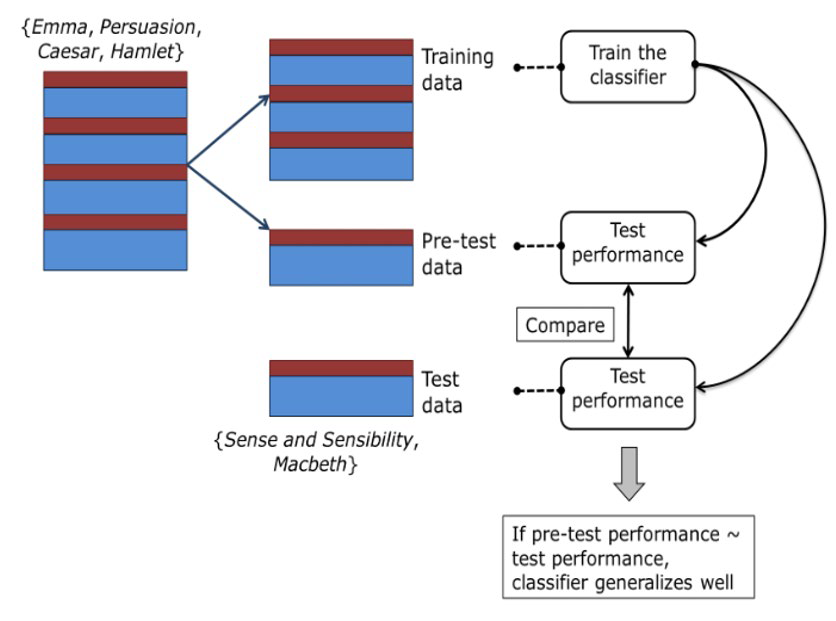

In [16]:
import random
import sklearn
from sklearn.model_selection import StratifiedShuffleSplit

all_sents = [(sent, "austen") for sent in author1_train]
all_sents += [(sent, "shakespeare") for sent in author2_train]
print (f"Dataset size = {str(len(all_sents))} sentences") #B
values = [author for (sent, author) in all_sents] #C
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) #D
strat_train_set = []
strat_pretest_set = []

for train_index, pretest_index in split.split(all_sents, values): #E
  strat_train_set = [all_sents[index] for index in train_index]
  strat_pretest_set = [all_sents[index] for index in pretest_index] #F

#B Combine all sentences into a single list all_sents, keeping the author label
#C Keep the set of labels (authors) as values
#D Initialize the split as a single stratified shuffle split with 20% of the data in the pretest set
#E The split runs on the all_sents data, taking care of the distribution in the values
#F Store the sentences with the correspondent indexes in strat_train_set and strat_pretest_set

Dataset size = 16768 sentences


In [17]:
def cat_proportions(data, cat): #A
  count = 0
  for item in data:
    if item[1]==cat:
      count += 1
  return float(count) / float(len(data))

categories = ["austen", "shakespeare"]
rows = []
rows.append(["Category", "Overall", "Stratified train", "Stratified pretest"]) #B
for cat in categories:
  rows.append([cat, f"{cat_proportions(all_sents, cat):.6f}",
                    f"{cat_proportions(strat_train_set, cat):.6f}",
                    f"{cat_proportions(strat_pretest_set, cat):.6f}"])

columns = zip(*rows)
column_widths = [max(len(item) for item in col) for col in columns]
for row in rows:
  print(''.join(' {:{width}} '.format(row[i], width=column_widths[i]) for i in range(0, len(row)))) #C

#A Calculate the proportion of the entries in each class (category) in the given dataset data
#B Apply this function to the three datasets
#C Use Python’s print out routines to produce the output in a formatted way

 Category     Overall   Stratified train  Stratified pretest 
 austen       0.685771  0.685776          0.685748           
 shakespeare  0.314229  0.314224          0.314252           


In [18]:
test_set = [(sent, "austen") for sent in author1_test]
test_set += [(sent, "shakespeare") for sent in author2_test] #A

#A Create a list test_set and store tuples mapping sentences to the author names in it

In [19]:
def get_features(text):
  features = {}
  word_list = [word for word in text]
  for word in word_list:
    features[word] = True
  return features #A

train_features = [(get_features(sents), label) for (sents, label) in strat_train_set]
pretest_features = [(get_features(sents), label) for (sents, label) in strat_pretest_set] #B

print(len(train_features))

print(train_features[0][0])
print(train_features[0][1])

print(train_features[100][0]) #C
print(train_features[100][1])

#A For each word in text, set presence flag to ‘True’ and, in the end, return a Python dictionary
#B Extract features from training and pretest sets
#C Run some checks to see what the data contains

13414
{'Pol': True, '.': True}
shakespeare
{'And': True, 'as': True, 'to': True, 'my': True, 'father': True, ',': True, 'I': True, 'really': True, 'should': True, 'not': True, 'have': True, 'thought': True, 'that': True, 'he': True, 'who': True, 'has': True, 'kept': True, 'himself': True, 'single': True, 'so': True, 'long': True, 'for': True, 'our': True, 'sakes': True, 'need': True, 'be': True, 'suspected': True, 'now': True, '.': True}
austen


In [20]:
from nltk import NaiveBayesClassifier, classify #A

print (f"Training set size = {str(len(train_features))} sentences")
print (f"Pretest set size = {str(len(pretest_features))} sentences")
classifier = NaiveBayesClassifier.train(train_features) #B

print (f"Accuracy on the training set = {str(classify.accuracy(classifier,train_features))}")
print (f"Accuracy on the pretest set = {str(classify.accuracy(classifier,pretest_features))}") #C

classifier.show_most_informative_features(50) #D

#A Import the classifier of your choice – NaiveBayesClassifier in this case
#B Train the classifier on the training set
#C Evaluate the performance on both training and pretest sets and print out the results
#D Print out the most informative features

Training set size = 13414 sentences
Pretest set size = 3354 sentences
Accuracy on the training set = 0.9786789920978083
Accuracy on the pretest set = 0.9636255217650567
Most Informative Features
                    been = True           austen : shakes =    257.7 : 1.0
                    King = True           shakes : austen =    197.1 : 1.0
                    thou = True           shakes : austen =    191.3 : 1.0
                    Lord = True           shakes : austen =     61.2 : 1.0
                    doth = True           shakes : austen =     60.4 : 1.0
                       d = True           shakes : austen =     58.9 : 1.0
                   quite = True           austen : shakes =     55.6 : 1.0
                     Tis = True           shakes : austen =     51.6 : 1.0
                     She = True           austen : shakes =     43.2 : 1.0
                   think = True           austen : shakes =     39.9 : 1.0
                    back = True           austen : shak

In [21]:
test_features = [(get_features(sents), label) for (sents, label) in test_set]
print (f"Test set size = {str(len(test_features))} sentences")
print (f"Accuracy on the test set = {str(classify.accuracy(classifier, test_features))}")

Test set size = 6906 sentences
Accuracy on the test set = 0.895742832319722


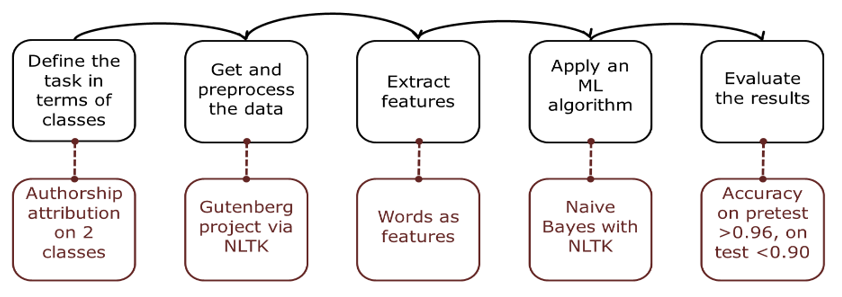

**DECESION TREE**

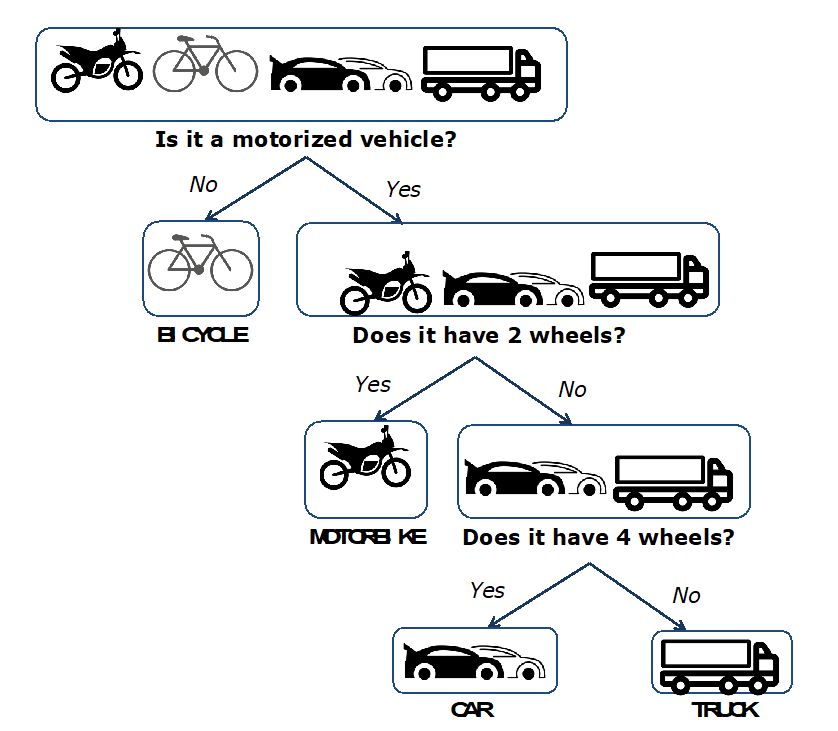

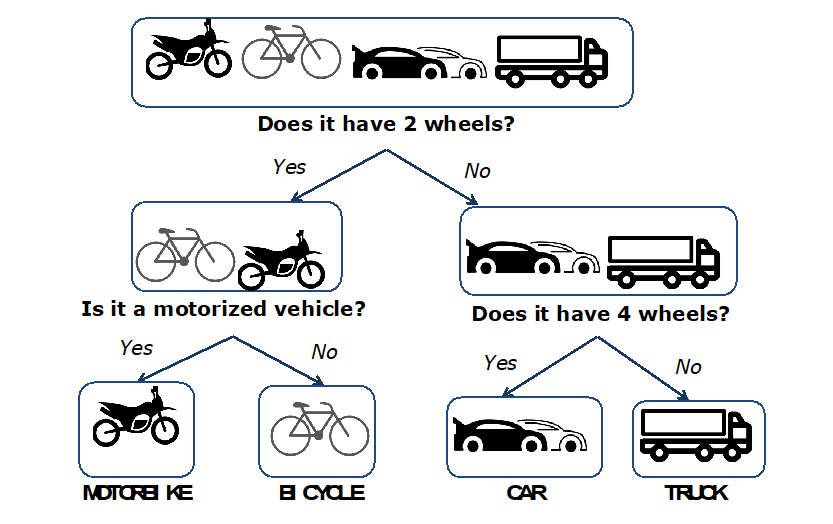

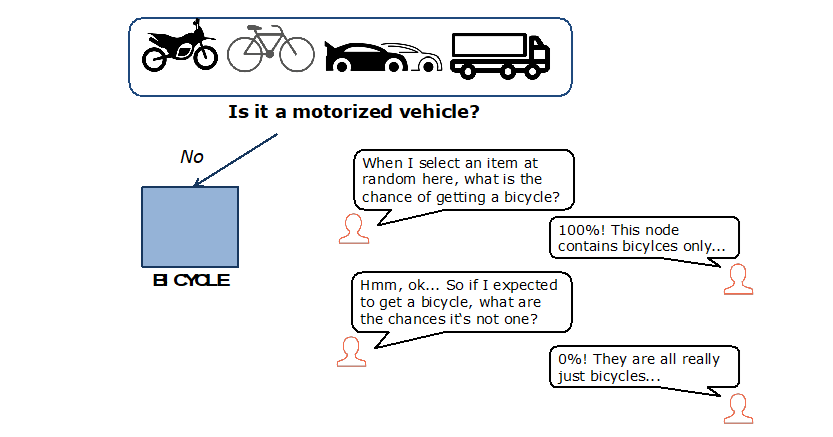

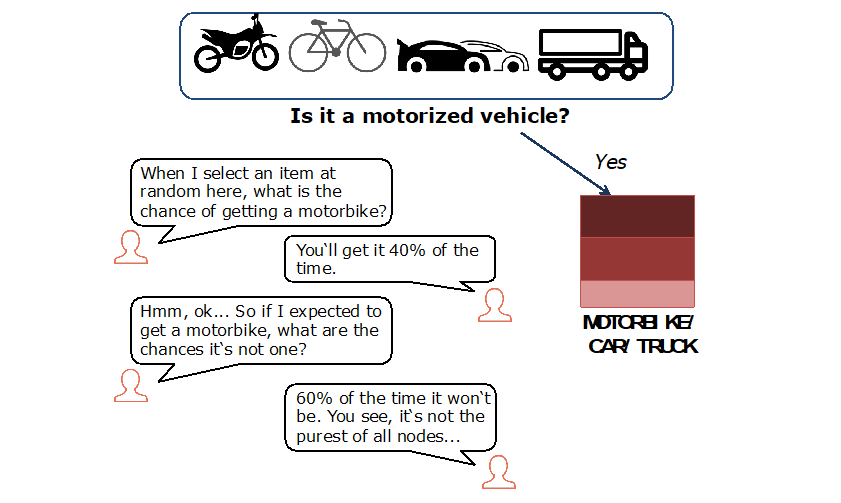

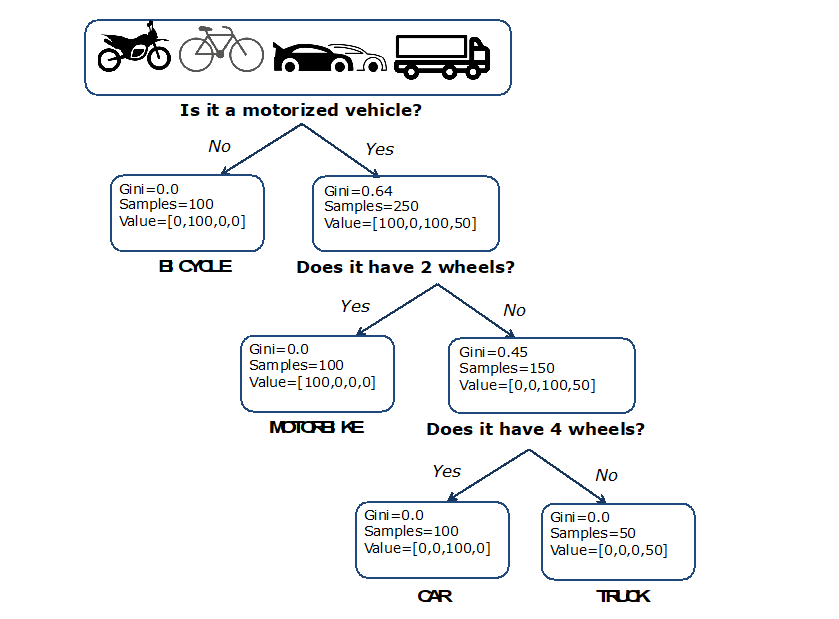

In [ ]:
# GIi = Σk,i (pk,i * (1 - pk,i)) = Σk,i pk,i - Σk,i (pk,i)2

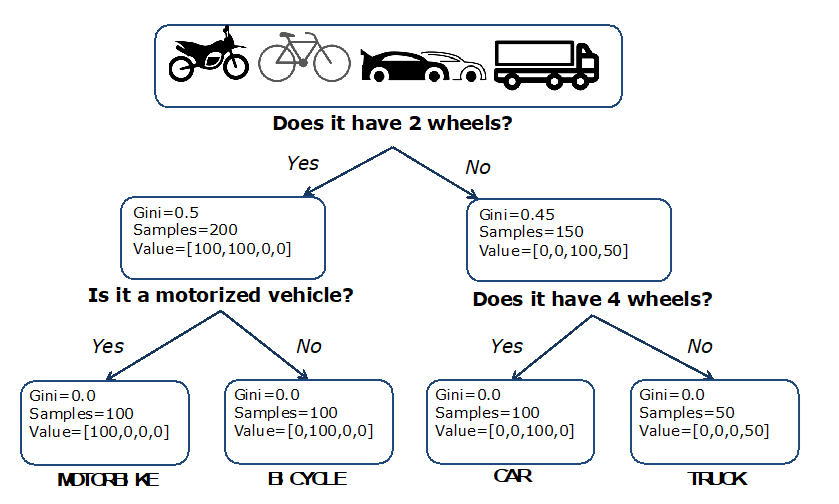

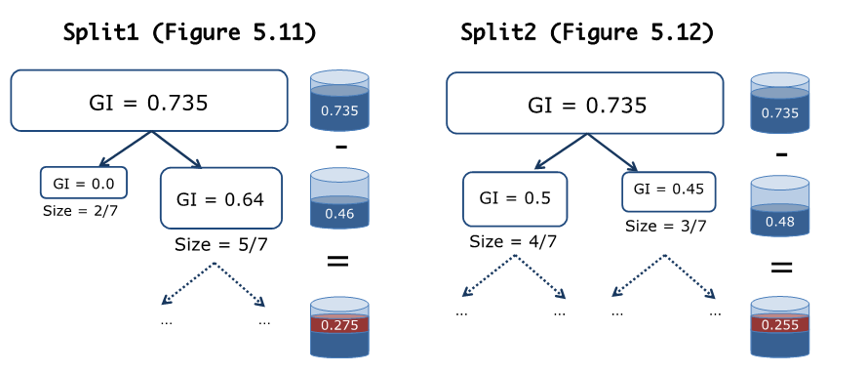

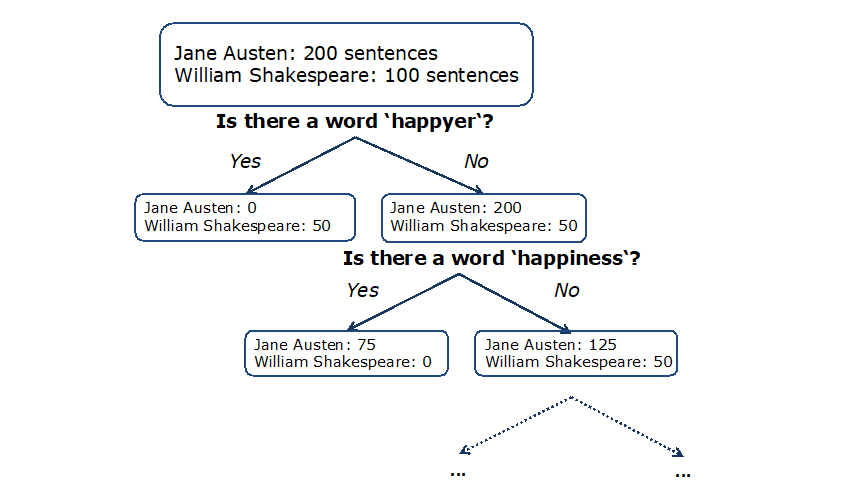

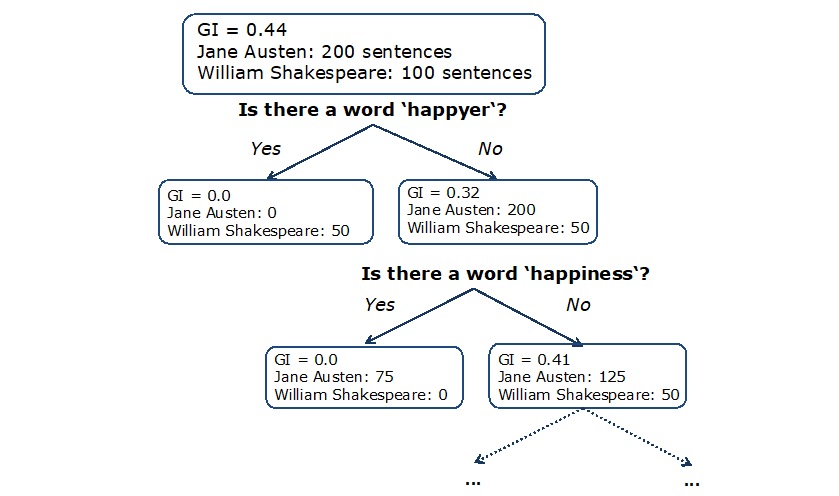

In [24]:
import pprint

In [26]:
# Feature Selection

from collections import Counter #A

words = []
def extract_words(text, words):
  words += set([word for word in text]) #B
  return words

for (sents, label) in strat_train_set:
  words = extract_words(sents, words) #C

counts = Counter(words) #D
print(counts)

#A Import Python’s Counter
#B Extract sets of words from each document
#C Extract words from all sentences in the strat_train_set
#D Apply Counter to calculate document frequency for each word in the training set

Counter({'.': 9108, ',': 7126, 'to': 4382, 'the': 4119, 'and': 3996, 'of': 3823, 'a': 3078, 'I': 2967, 'in': 2473, 'not': 2450, ';': 2411, 'was': 2317, 'it': 2269, 'be': 2149, 'that': 1949, '"': 1932, 'you': 1884, 'her': 1877, "'": 1702, 'had': 1595, 'for': 1582, 'she': 1542, 'with': 1489, 'is': 1480, 'but': 1439, 'as': 1381, 'he': 1372, 'have': 1316, 'his': 1241, '."': 1238, 'at': 1178, 'very': 1150, 'all': 1106, 's': 1097, 'him': 1071, 'so': 1028, 'Mr': 1009, 'my': 990, 'could': 957, 'on': 904, 'would': 886, '--': 863, 'me': 856, '?': 856, ':': 853, 'been': 844, 'by': 800, 'were': 791, 'no': 785, 'this': 742, 'which': 725, 'Mrs': 716, 'She': 713, 'do': 709, 'will': 706, '-': 700, '!': 687, 'from': 677, 'must': 672, 'any': 666, 'Emma': 657, 'more': 616, 'The': 613, 'or': 610, 'them': 607, 'He': 598, 'what': 590, 'an': 590, 'are': 586, 'they': 577, 'And': 563, 'much': 561, 'there': 551, 'your': 535, 'It': 531, 'said': 530, 'one': 517, 'than': 514, ',"': 513, 'Miss': 506, 'such': 506, '

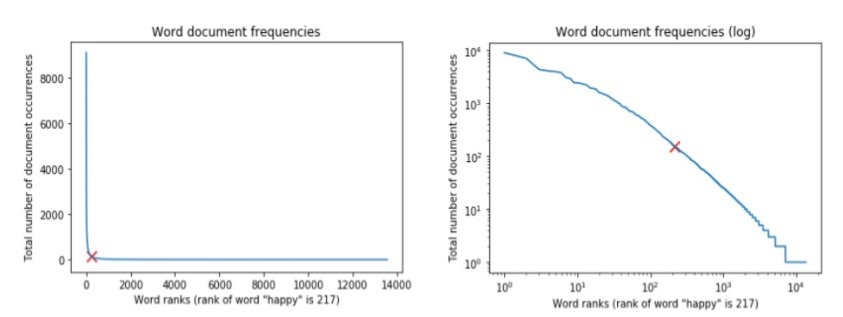

In [27]:
from nltk import DecisionTreeClassifier #A

maximum = float(13414) #B
selected_words = []

for item in counts.items():
  count = float(item[1])
  if count > 200 and count/maximum < 0.2: #C
    selected_words.append(item[0])
print(len(selected_words))

def get_features(text, selected_words): #D
  features = {}
  word_list = [word for word in text]
  for word in word_list:
    if word in selected_words:
      features[word] = True
  return features

train_features = [(get_features(sents, selected_words), label) for (sents, label) in strat_train_set]
pretest_features = [(get_features(sents, selected_words), label) for (sents, label) in strat_pretest_set]
test_features = [(get_features(sents, selected_words), label) for (sents, label) in test_set] #E

classifier = DecisionTreeClassifier.train(train_features) #F

print (f"Accuracy on the training set = {str(classify.accuracy(classifier, train_features))}")
print (f"Accuracy on the pretest set = {str(classify.accuracy(classifier, pretest_features))}")
print (f"Accuracy on the test set = {str(classify.accuracy(classifier, test_features))}") #G

#A Import NLTK’s DecisionTreeClassifier
#B The maximum number of sentences in which a word may occur is 13,414
#C Select words based on the minimum and the maximum occurrence thresholds
#D Extract features from the sentences by only including the words from the selected_words list
#E Extract features from all three datasets
#F Train the classifier
#G Report the accuracy scores on each of the datasets

166
Accuracy on the training set = 0.8093782615178172
Accuracy on the pretest set = 0.7954680977936792
Accuracy on the test set = 0.808282652765711


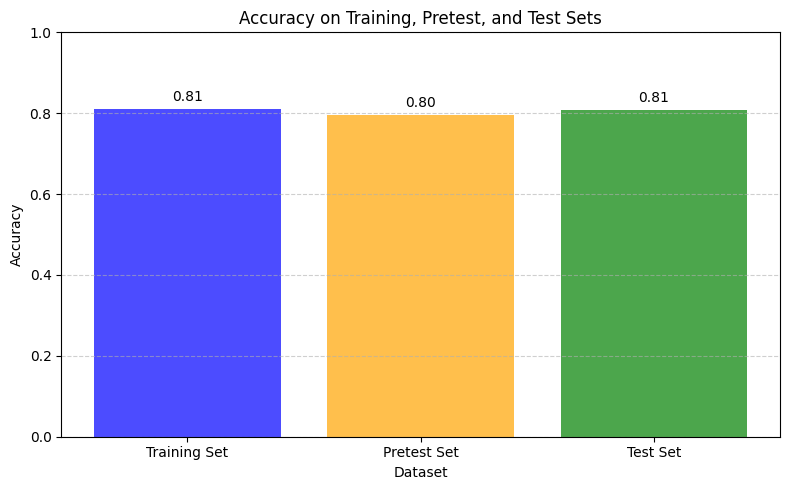

In [28]:
import matplotlib.pyplot as plt

training_accuracy = classify.accuracy(classifier, train_features)
pretest_accuracy = classify.accuracy(classifier, pretest_features)
test_accuracy = classify.accuracy(classifier, test_features)

labels = ['Training Set', 'Pretest Set', 'Test Set']
accuracies = [training_accuracy, pretest_accuracy, test_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange', 'green'], alpha=0.7)
plt.ylim(0, 1)
plt.title('Accuracy on Training, Pretest, and Test Sets')
plt.ylabel('Accuracy')
plt.xlabel('Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()